<a href="https://colab.research.google.com/github/ikhlas15/ATHENS-AI-Medical-Imaging/blob/main/H03_image_ops_with_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 03: Efficient Image Processing with Libraries**

### **Course**: Artificial Intelligence in Medical Imaging: From Fundamentals to Applications

***

## **1. Introduction**

Welcome to Notebook 03! In the previous session, you learned the fundamental theory behind image processing by implementing convolution, blurring, and edge detection from scratch. While that's an excellent way to build intuition, it's not how these tasks are performed in practice.

For real-world applications, we use highly optimized, powerful libraries that perform these operations with a single line of code. They are faster, more robust, and contain a vast array of additional functionalities.

In this notebook, we will revisit the same operations from last time, but now we will use two of the most popular image processing libraries in Python:
*   **OpenCV (`cv2`):** A comprehensive, industry-standard library for all things computer vision.
*   **scikit-image (`skimage`):** A user-friendly library that integrates seamlessly with the scientific Python ecosystem (NumPy, SciPy, Matplotlib).

#### **What you will learn today:**
*   How to perform blurring and noise reduction using `cv2.GaussianBlur` and `skimage.filters.median`.
*   How to apply advanced contrast enhancement techniques like **CLAHE**.
*   How to detect edges with `skimage.filters.sobel`.
*   How to use **morphological operations** (like closing and opening) to clean up binary masks.

***

## **2. Setup: Installing and Importing Libraries**

First, let's install the libraries we'll need for this session.

In [ ]:
# Install the necessary libraries using pip
!pip install opencv-python-headless scikit-image pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 42.2 MB/s eta 0:00:00


Now, let's import them along with our usual tools.

In [ ]:
# TODO: Import OpenCV for fast image processing (blurring, filtering, CLAHE, etc.)


# TODO: Import the scikit-image package (skimage) for scientific image processing


# TODO: Import useful modules from skimage:
# - filters: for edge detection and denoising
# - morphology: for cleaning binary masks (opening/closing)
# - exposure: for contrast adjustments


# TODO: Import pydicom to load DICOM medical images

from pydicom.data import get_testdata_file

# TODO: Import NumPy for numerical operations


# TODO: Import Matplotlib to display images



***

## **3. Loading Our Medical Image**

To maintain consistency, we will again load our sample CT slice and convert it to Hounsfield Units (HU). This will be our starting point for all operations.


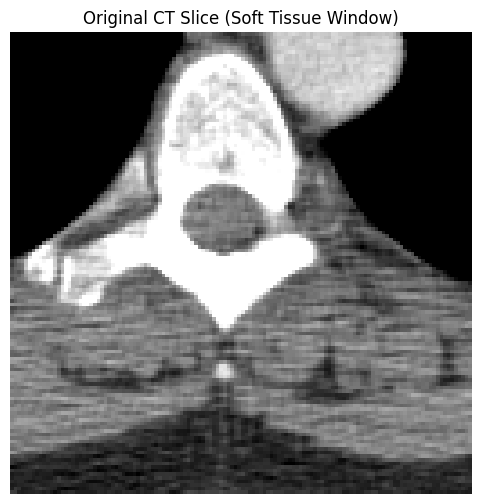

In [ ]:
# Load the DICOM CT image
dicom_file_path = ...("CT_small.dcm")
dicom_data = pydicom.dcmread()

# TODO: Convert to Hounsfield Units (HU) using HU=pixel × RescaleSlope+RescaleIntercept
image_hu = ...

# We also need an 8-bit version (0-255) for many library functions.
# Let's use the soft tissue window we created in the last notebook.
def apply_windowing(image, window_level, window_width):
    min_val = ...                # L - W/2
    max_val = ...                # L + W/2
    windowed = np.clip(image, min_val, max_val)
    # TODO: Normalize to 0-255
    windowed =
    return windowed. ...  #TODO: Return the window in uint8 type

# Create an 8-bit image using a soft tissue window, L=40, W=400
image_8bit =

# Display the starting image
plt.figure(figsize=(6, 6))
plt.imshow(..., cmap=plt.cm.gray)
plt.title("Original CT Slice (Soft Tissue Window)")
plt.axis('off')
plt.show()

***

## **4. Noise Reduction (Smoothing) with Libraries**

Noise is a common problem in medical images that can interfere with analysis. Smoothing filters are used to reduce it.

### **4.1. Gaussian Blurring with OpenCV**

This is the same operation you implemented from scratch, but now in one line. It's excellent for reducing random, high-frequency noise.


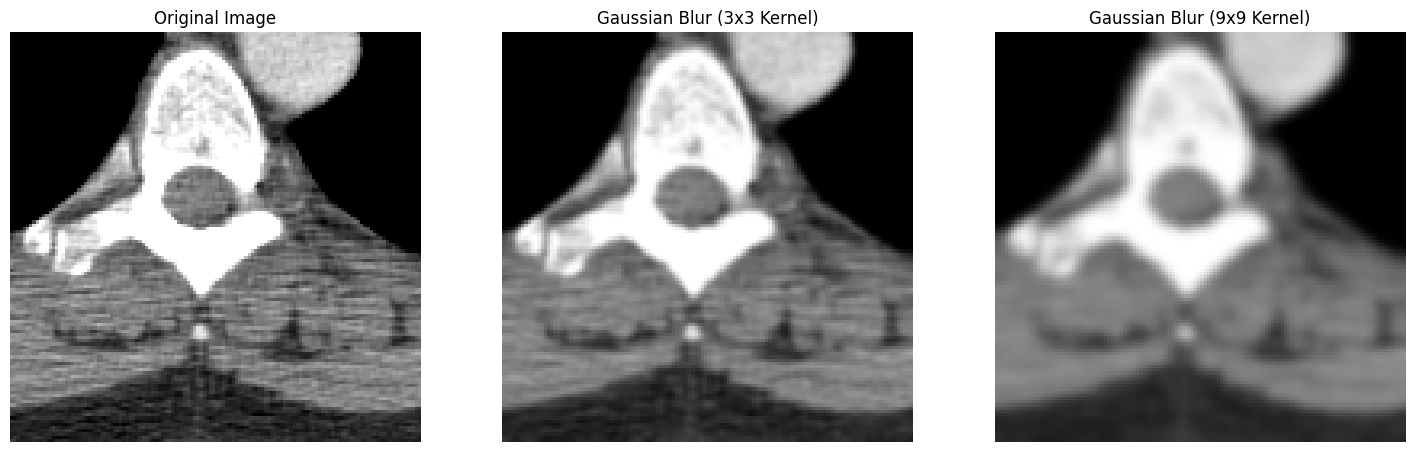

In [ ]:
# Apply Gaussian blur with different kernel sizes using OpenCV
# The third argument (sigmaX) is the standard deviation. 0 means it's calculated from the kernel size.
blur_3x3 = cv2.GaussianBlur(image_8bit, ksize=(3, 3), sigmaX=0)
blur_9x9 = ...

# Display the results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(image_8bit, cmap=plt.cm.gray)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Display the blurred images


plt.show()

### **4.2. Median Filtering with scikit-image**

A **median filter** replaces each pixel's value with the median value of its neighbors. It is particularly effective at removing "salt-and-pepper" noise while being better at preserving sharp edges than a Gaussian filter.


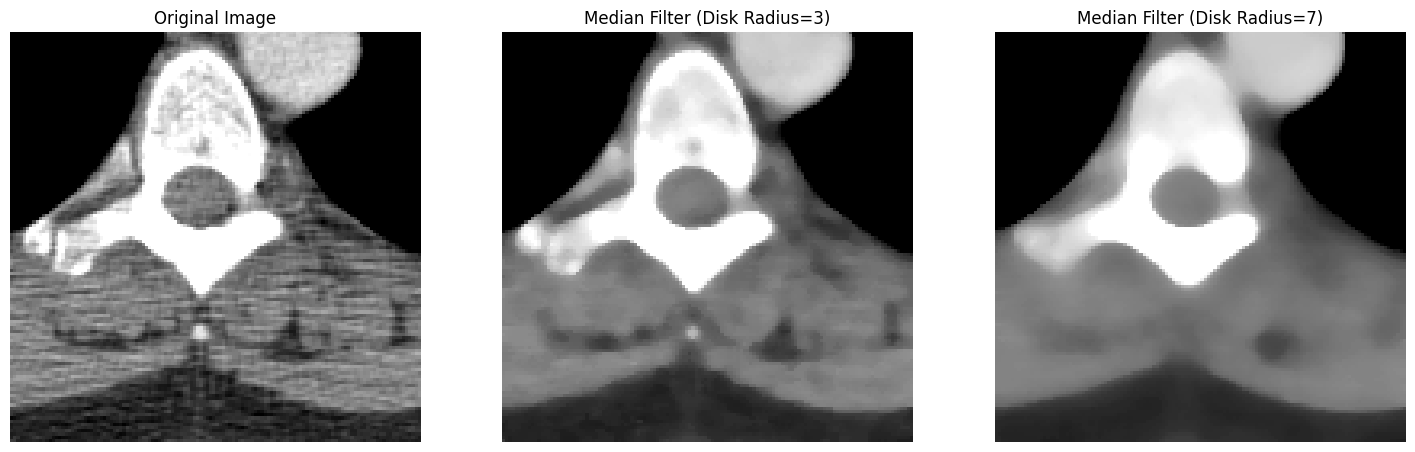

In [ ]:
# Apply a median filter with different disk sizes using scikit-image
median_filtered_3 = filters.median(image_8bit, footprint=morphology.disk(3))

# TODO: Apply a stronger median filter using a larger disk (radius=7)
median_filtered_7 =

# Display the results


*Compare the median-filtered images to the Gaussian-blurred ones. Notice how the edges around the organs remain sharper with the median filter.*

***

## **5. Contrast Enhancement with CLAHE**

Simple windowing is effective, but sometimes we need to enhance local contrast to see subtle details. **Contrast Limited Adaptive Histogram Equalization (CLAHE)** is a powerful technique that improves contrast in small regions of an image rather than globally. This helps to bring out texture and detail in both bright and dark areas.


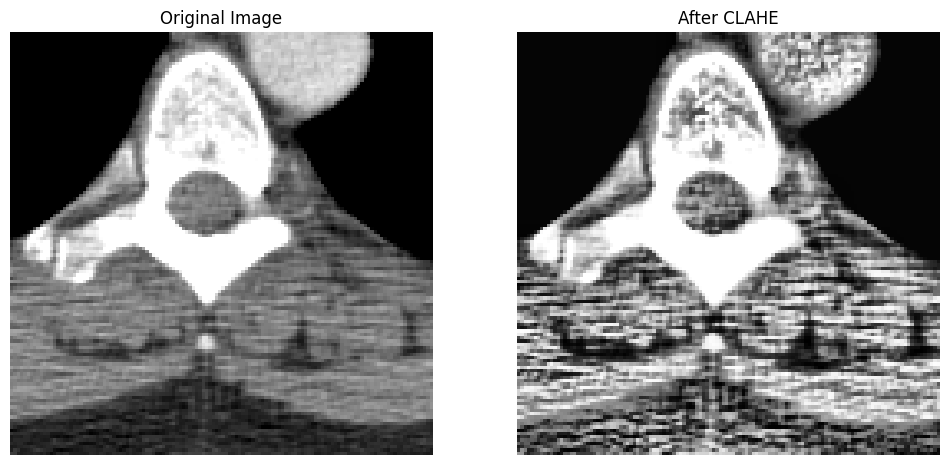

In [ ]:
# TODO: Apply CLAHE using scikit-image
# Hint: use exposure.equalize_adapthist with clip rate = 0.03
clahe_image =

# Display the results: the original image and the CLAHE image
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


*Notice how the internal structures in the CLAHE image are much more defined.*

***

## **6. Edge Detection and Morphological Operations**

These operations are the building blocks of many segmentation pipelines. We first detect edges or create a rough binary mask and then use morphological operations to refine it.

### **6.1. Edge Detection with Sobel Filter**

Let's use `skimage.filters.sobel` to find the edges in our image instantly.

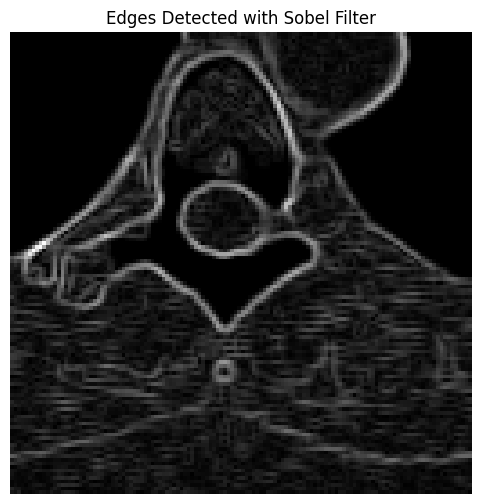

In [ ]:
# Apply the Sobel filter to find the edge magnitude
# The input image should be scaled to the 0-1 range
edge_sobel =

# Display the result (figsize = (6,6))


### **6.2. Refining Masks with Morphological Operations**

Often, a simple threshold produces a "noisy" mask with small holes or stray pixels. **Morphological operations** use a small shape, called a **structuring element**, to clean up these binary masks.

*   **Closing:** Fills small holes inside an object. It is a dilation followed by an erosion.
*   **Opening:** Removes small, isolated objects (noise). It is an erosion followed by a dilation.

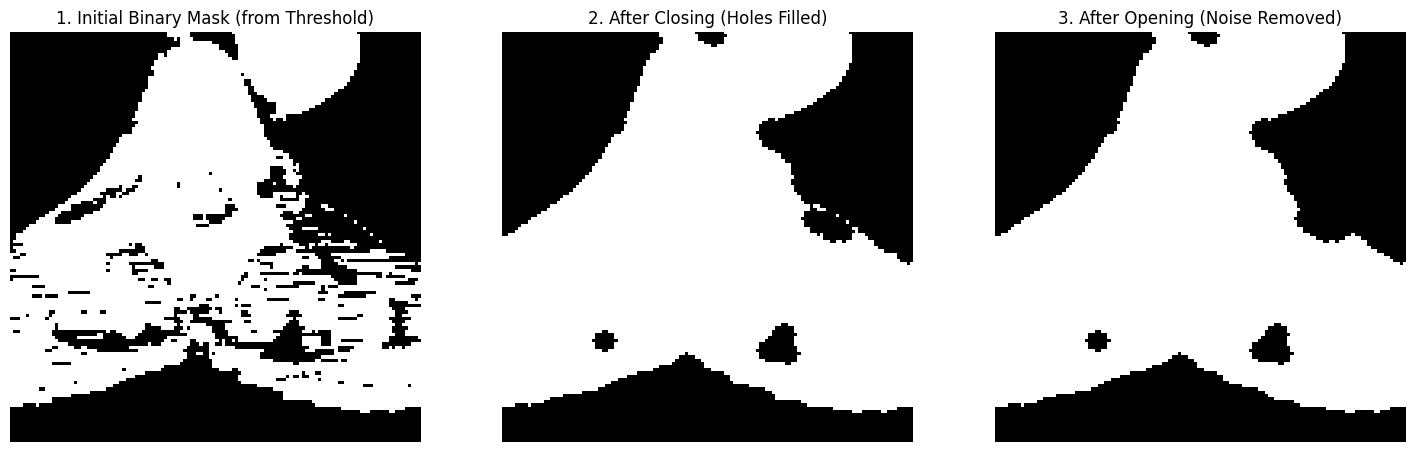

In [ ]:
# First, create a rough binary mask using a threshold
# `filters.threshold_otsu` automatically finds a good threshold value
threshold_value = ...(image_8bit)
# TODO: Create a rough binary mask with T/F
binary_mask =

# Define a disk-shaped structuring element
selem = morphology.disk(3)

# Apply morphological closing to fill holes in the main structures
#TODO: Apply morphological closing (dilation → erosion)
mask_closed = morphology.binary_closing()

# Apply morphological opening to remove small noise specks
# TODO: Apply morphological opening (erosion → dilation)
mask_opened =

# # TODO: Display all three images (original mask, closed, opened)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(binary_mask, cmap='gray')
axes[0].set_title("1. Initial Binary Mask (from Threshold)")
axes[0].axis('off')



plt.show()

*This step-by-step refinement is a very common and powerful technique for creating clean segmentation masks.*

***

## **7. Summary and Next Steps**

In this notebook, you have leveled up your image processing skills by learning how to use professional, high-performance libraries. You have seen how to:
*   Perform **Gaussian** and **Median filtering** for noise reduction.
*   Enhance local image contrast with **CLAHE**.
*   Detect edges with a one-line **Sobel** filter.
*   Refine binary masks using **morphological closing and opening**.

You are now equipped with a powerful toolkit for preprocessing medical images.

In our next session, **`04_ml_fundamentals_from_scratch.ipynb`**, we will shift gears and begin our journey into machine learning. We will start from first principles, implementing a simple classifier on image data to understand the core concepts of model training and evaluation.
